In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [39]:
from SHDataset import SHDataset
from utils.utils import *
from models.histogram import HistogramDetector

In [5]:
bbox = (52.335, 52.36, 4.89, 4.92)

dataset = SHDataset()
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

### The Histogram method builds a histogram using the trajectories from the second snapshot (T' or T2 in code)

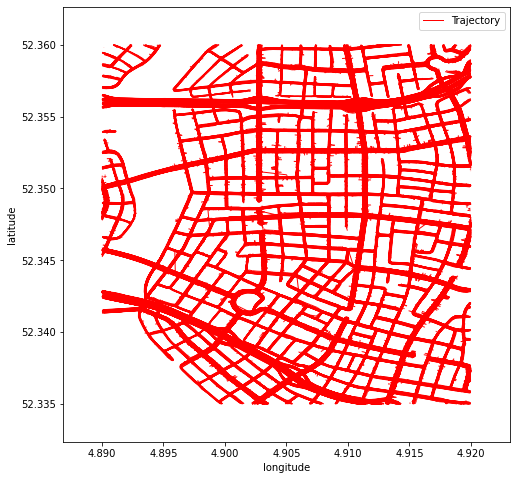

In [50]:
plot_graph(traj_to_nxgraph(T2['T']), savename='./figures/histogram_pipeline_trajectories', show_img=False)

In [6]:
hist_det = HistogramDetector(G1, bbox=bbox)

In [7]:
G2_pred = hist_det.forward(T2['T'])

Running Histogram Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████| 37428/37428 [00:29<00:00, 1279.07it/s]


### This is what the histogram ends up looking like from the trajectories above

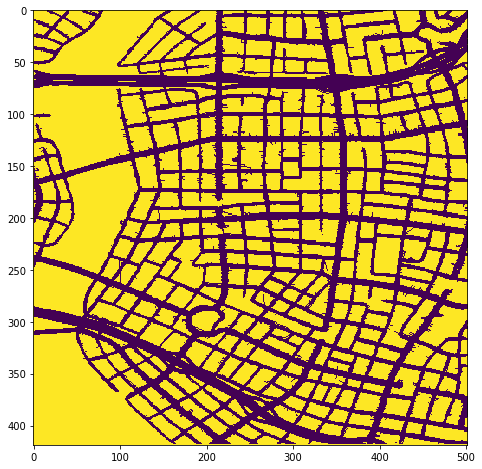

In [55]:
plot_hist(hist_det.hist, figsize=(12,8), savename='./figures/histogram_pipeline_2dhist')

### After "ExtractScores" is run in the algorithm, it assigns weights to every edge. The higher the weight, the more likely the road is removed

In [ ]:
plot_graph(G2_pred, use_weights=True, figsize=(9.5,8)m, savename='./figures/histogram_pipeline_colormap', show_img=False)

### The following plot shows the actual removed roads, or ground-truth, where removed roads are highlighted in magenta. We can see that the removed roads correspond well to the heatmap from the histogram method above

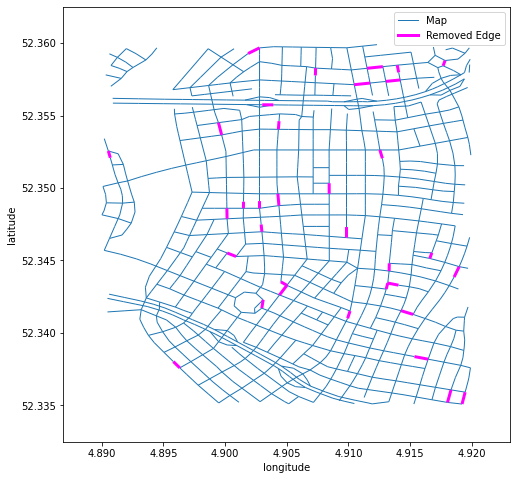

In [53]:
G2_diff = compare_snapshots(G1,G2)[1]
plot_graph(G2_diff, removed_road_edge_width=3, savename='./figures/histogram_pipeline_groundtruth', show_img=False)